# Analysis of finalized serum neut assays
Initial screening of bulk set of sera can be found in `old_analyses/` in this directory. Here, we analyze finalized data for sera that neutralize the wildtype library chimera at high enough potency for selection experiments.

In [1]:
import pandas as pd

import neutcurve
from neutcurve.colorschemes import CBMARKERS, CBPALETTE

import matplotlib

import warnings
warnings.filterwarnings("ignore")

Combine finalized neut data from 3 different runs:
* 220930 - ran H6 neuts at much higher concentrations than original screening, found that selection concentrations actually neutralize H6
* 221006 - ran neuts for sera AUSAB-07 and AUSAB-13 against both HK19 and H6
* 221031 - redid H3 neuts for AUSAB-02, 05, and 11.

In [2]:
run1 = pd.read_excel('neut_data/220930_serum-H6-neuts_tidy_edited.xlsx')

run2 = pd.read_csv('neut_data/221006_ser-07-13_neuts_tidy.csv')

run3 = pd.read_csv('neut_data/221031_neuts_tidy.csv')

neut_data_tidy = pd.concat([run1, run2, run3])

# normalize naming - sera from 9-30 run had naming reversed
serum_dict = {
    '02-AUSAB': 'AUSAB-02',
    '05-AUSAB': 'AUSAB-05',
    '06-AUSAB': 'AUSAB-06', 
    '11-AUSAB': 'AUSAB-11'
}

neut_data_tidy = neut_data_tidy.replace({'serum': serum_dict})

In [3]:
# fit with neutcurve package
fits = neutcurve.CurveFits(neut_data_tidy)

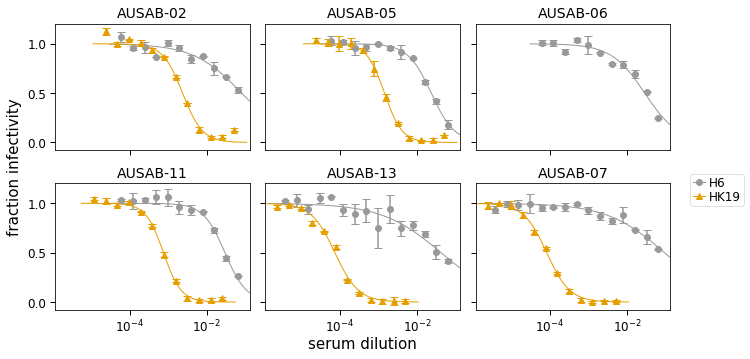

In [4]:
fig, axes = fits.plotSera(ncol=3,
                          xlabel='serum dilution',
                          sharex = True
                         )

Get table listing IC99 values for each serum:

In [9]:
serum_ic99 = fits.fitParams(ics=[99])
serum_ic99.loc[serum_ic99['virus'] == 'HK19']

,serum,virus,replicate,nreplicates,ic99,ic99_bound,ic99_str,midpoint,slope,top,bottom
1,AUSAB-02,HK19,average,2,0.035685,interpolated,0.0357,0.002353,1.690083,1,0
3,AUSAB-05,HK19,average,2,0.016014,interpolated,0.016,0.001433,1.903975,1,0
6,AUSAB-11,HK19,average,2,0.008454,interpolated,0.00845,0.000753,1.899831,1,0
8,AUSAB-13,HK19,average,2,0.001881,interpolated,0.00188,0.000075,1.425123,1,0
10,AUSAB-07,HK19,average,2,0.001936,interpolated,0.00194,0.000082,1.455158,1,0


For several of these sera, concentrations that have been used for selections (at or above IC99) also significantly neutralize H6. Mark the concentrations used for selections on these plots: